In [1]:
# imports
import pandas as pd
import numpy as np

In [5]:
# load data
ts = pd.read_csv('../data/all_currencies.csv', index_col=0)
ts

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN
...,...,...,...,...,...,...,...,...
298,2018-09-23,ZZC,0.067149,0.067324,0.024069,0.024161,34.0,130705.0
299,2018-09-24,ZZC,0.024167,0.091875,0.024121,0.091631,58.0,47041.0
300,2018-09-25,ZZC,0.091528,0.091568,0.057507,0.090547,752.0,178158.0
301,2018-09-26,ZZC,0.090400,0.104745,0.086071,0.086559,60.0,175963.0


In [6]:
ts.columns

Index(['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Market Cap'],
      dtype='object')

In [7]:
ts['Market Cap'].isna().value_counts()

False    567841
True      64377
Name: Market Cap, dtype: int64

In [8]:
ts.Symbol.nunique()

887

In [9]:
ts.Symbol.value_counts()[-870:]

FRC      1868
IFC      1867
QRK      1856
PXC      1844
ZET      1840
         ... 
DACH        2
ANON        2
PHON        2
MNP         2
AZART       1
Name: Symbol, Length: 870, dtype: int64

In [144]:
# dollar eda
dollarf = ts[ts['Symbol']=='$$$']
dollarf.Date[-1:]

1039    2018-09-27
Name: Date, dtype: object

In [145]:
dollarf.shape[0]

1040

In [146]:
dollarf.Close[-1:]

1039    0.000935
Name: Close, dtype: float64

In [152]:
# create dataframe of meta data
meta_data = pd.DataFrame(columns=['Symbol', 'Start Data', 'End Date', 'Value At Start', 'Value at End', 'ATH', 'ATL', 'Num_values'])

In [153]:
# find start, end dates and number of data points for each coin
i=0
for coin in ts.Symbol.unique():
    # instantiate list to add to metadata frame
    my_list = [coin]
    
    # get data for coin from big df
    df = ts[ts['Symbol'] == coin]

    # find start date
    my_list.append(df.Date[0])
    
    # find end date
    my_list.append(df.Date[-1:])
    
    # find starting value
    my_list.append(df.Open[0])

    # find ending value
    my_list.append(df.Close[-1:])

    # find all time high
    my_list.append(max(df.High))

    # find all time low
    my_list.append(min(df.Low))

    # find number of entries
    my_list.append(df.shape[0])

    # add coin info to df
    meta_data.loc[i] = my_list
#     print(coin)
    i+=1
        
meta_data

,Symbol,Start Data,End Date,Value At Start,Value at End,ATH,ATL,Num_values
0,$$$,2015-11-12,"1039 2018-09-27 Name: Date, dtype: object",1.300000e-05,"1039 0.000935 Name: Close, dtype: float64",2.282200e-02,4.000000e-06,1040
1,$PAC,2015-11-02,"1052 2018-09-27 Name: Date, dtype: object",7.200000e-09,"1052 0.002622 Name: Close, dtype: float64",1.704500e-02,2.300000e-09,1053
2,1337,2015-11-09,"1053 2018-09-27 Name: Date, dtype: object",8.000000e-05,"1053 0.000075 Name: Close, dtype: float64",1.454000e-03,6.200000e-07,1054
3,2GIVE,2016-05-16,"864 2018-09-27 Name: Date, dtype: object",1.920000e-04,"864 0.003664 Name: Close, dtype: float64",6.224200e-02,8.200000e-05,865
4,42,2014-01-14,"1702 2018-09-27 Name: Date, dtype: object",1.013620e+06,"1702 24176.0 Name: Close, dtype: float64",1.146320e+06,8.990000e+00,1703
...,...,...,...,...,...,...,...,...
882,ZP,2018-08-20,"38 2018-09-27 Name: Date, dtype: object",7.362340e-01,"38 0.43237 Name: Close, dtype: float64",1.170000e+00,3.321740e-01,39
883,ZSE,2017-03-30,"545 2018-09-27 Name: Date, dtype: object",1.217860e-01,"545 0.009013 Name: Close, dtype: float64",3.640940e-01,8.360000e-04,546
884,ZUR,2016-05-09,"790 2018-09-25 Name: Date, dtype: object",5.500000e-05,"790 0.000513 Name: Close, dtype: float64",3.215200e-02,9.000000e-06,791
885,ZYD,2016-09-17,"717 2018-09-27 Name: Date, dtype: object",1.049100e-02,"717 0.00454 Name: Close, dtype: float64",2.668100e-02,8.570000e-04,718


In [154]:
coin = '$$$'
# instantiate list to add to metadata frame
my_list = [coin]
df = ts[ts['Symbol'] == coin]

# find start date
my_list.append(df.Date[0])
    
# find end date
my_list.append(max(df['Date']))
    
# find starting value
my_list.append(df.Open[0])

# find ending value
my_list.append(float(df['Close'][-1:]))

# find all time high
my_list.append(max(df.High))

# find all time low
my_list.append(min(df.Low))

   # find number of entries
my_list.append(df.shape[0])

my_list

['$$$',
 '2015-11-12',
 '2018-09-27',
 1.3000000000000001e-05,
 0.000935,
 0.022822,
 4e-06,
 1040]

In [155]:
meta_data

,Symbol,Start Data,End Date,Value At Start,Value at End,ATH,ATL,Num_values
0,$$$,2015-11-12,"1039 2018-09-27 Name: Date, dtype: object",1.300000e-05,"1039 0.000935 Name: Close, dtype: float64",2.282200e-02,4.000000e-06,1040
1,$PAC,2015-11-02,"1052 2018-09-27 Name: Date, dtype: object",7.200000e-09,"1052 0.002622 Name: Close, dtype: float64",1.704500e-02,2.300000e-09,1053
2,1337,2015-11-09,"1053 2018-09-27 Name: Date, dtype: object",8.000000e-05,"1053 0.000075 Name: Close, dtype: float64",1.454000e-03,6.200000e-07,1054
3,2GIVE,2016-05-16,"864 2018-09-27 Name: Date, dtype: object",1.920000e-04,"864 0.003664 Name: Close, dtype: float64",6.224200e-02,8.200000e-05,865
4,42,2014-01-14,"1702 2018-09-27 Name: Date, dtype: object",1.013620e+06,"1702 24176.0 Name: Close, dtype: float64",1.146320e+06,8.990000e+00,1703
...,...,...,...,...,...,...,...,...
882,ZP,2018-08-20,"38 2018-09-27 Name: Date, dtype: object",7.362340e-01,"38 0.43237 Name: Close, dtype: float64",1.170000e+00,3.321740e-01,39
883,ZSE,2017-03-30,"545 2018-09-27 Name: Date, dtype: object",1.217860e-01,"545 0.009013 Name: Close, dtype: float64",3.640940e-01,8.360000e-04,546
884,ZUR,2016-05-09,"790 2018-09-25 Name: Date, dtype: object",5.500000e-05,"790 0.000513 Name: Close, dtype: float64",3.215200e-02,9.000000e-06,791
885,ZYD,2016-09-17,"717 2018-09-27 Name: Date, dtype: object",1.049100e-02,"717 0.00454 Name: Close, dtype: float64",2.668100e-02,8.570000e-04,718


In [156]:
import matplotlib.pyplot as plt

In [157]:
ath = meta_data.ATH
atl = meta_data.ATL
num = meta_data.Num_values

Text(0.5, 0.9, 'Highs, Lows vs Number of Data Points')

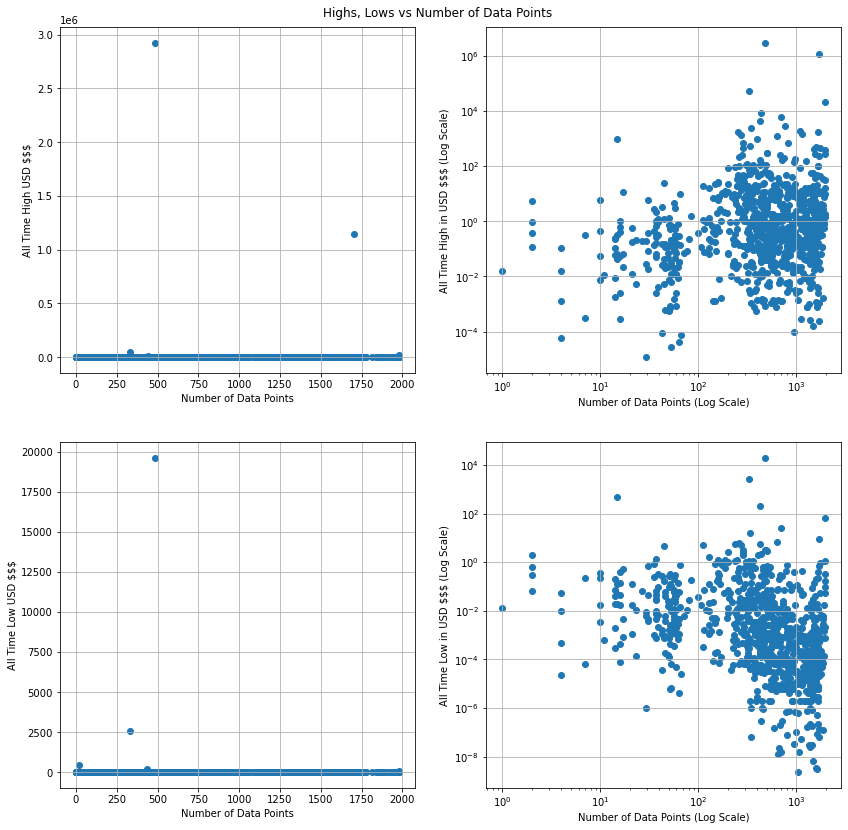

In [158]:
# plot ATH and ATL 
m = 2
n = 2
figsize = (14,14)
fig, ax = plt.subplots(nrows=m, ncols=n, figsize=figsize)

# turn grids on 
# for i in range(0,m):
#     for k in range(0,n):
#         ax[i,k].grid(True)
ax[0,0].grid(True)
ax[0,1].grid(True)
ax[1,0].grid(True)
ax[1,1].grid(True)


ax[0,0].scatter(num, ath)
ax[0,0].set_xlabel('Number of Data Points')
ax[0,0].set_ylabel('All Time High USD $$$')


ax[0,1].scatter(num, ath)
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].set_xlabel('Number of Data Points (Log Scale)')
ax[0,1].set_ylabel('All Time High in USD $$$ (Log Scale)')

ax[1,0].scatter(num, atl)
ax[1,0].set_xlabel('Number of Data Points')
ax[1,0].set_ylabel('All Time Low USD $$$')

ax[1,1].scatter(num, atl)
ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')
ax[1,1].set_xlabel('Number of Data Points (Log Scale)')
ax[1,1].set_ylabel('All Time Low in USD $$$ (Log Scale)')

fig.suptitle('Highs, Lows vs Number of Data Points', y=0.9)

In [159]:
x = [123, 670, 50, 327, 910]
INCREMENT = 500
hist = {}

for val in x:
  bin = (val // INCREMENT) * INCREMENT
  freq = hist.get(bin, 0) + 1
  hist[bin] = freq

hist

{0: 3, 500: 2}

Text(0, 0.5, 'Number of Coins')

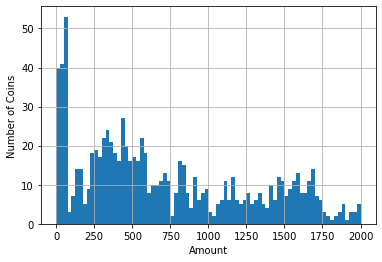

In [160]:
interval = 25

nbins = 2000//interval
bins=[interval*x for x in range(0,nbins+1)]

meta_data['Num_values'].hist(bins=bins)
plt.xlabel('Amount')
plt.ylabel('Number of Coins')

Text(0.5, 1.0, 'Coins Grouped by Amount of Data')

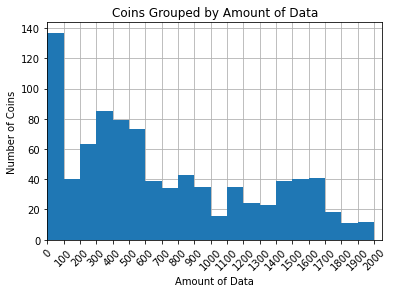

In [161]:
# create histogram to show various distributions of coins
fig, ax = plt.subplots()

interval = 100

nbins = 2000//interval
bins=[interval*x for x in range(0,nbins+1)]

ax.hist(num, bins=bins, range=(0,2100))

ax.set_xlim(0,2050)
ax.set_xticks(bins)
ax.set_xticklabels(bins, rotation=45)
ax.grid(True)
ax.set_axisbelow(True)
ax.set_xlabel('Amount of Data')
ax.set_ylabel('Number of Coins')
ax.set_title('Coins Grouped by Amount of Data')

(array([885.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.20000e-05, 2.92610e+05, 5.85220e+05, 8.77830e+05, 1.17044e+06,
        1.46305e+06, 1.75566e+06, 2.04827e+06, 2.34088e+06, 2.63349e+06,
        2.92610e+06]),
 <BarContainer object of 10 artists>)

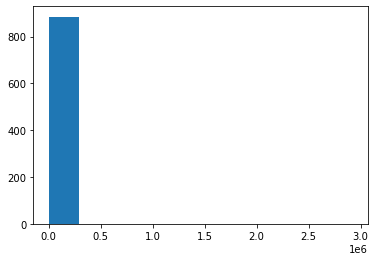

In [162]:
# graph ATH and ATL histogram
fig, ax = plt.subplots()

ax.hist(ath)

In [171]:
ts.sort_values('Low', ascending=False)

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
209,2017-12-26,NANOX,2.298390e+06,2.926100e+06,2.030590e+06,2.278930e+06,134610.0,179881.0
208,2017-12-25,NANOX,1.884830e+06,2.708300e+06,1.481080e+06,2.300740e+06,126628.0,147514.0
207,2017-12-24,NANOX,1.446030e+06,2.633290e+06,1.331690e+06,1.866850e+06,322658.0,113172.0
210,2017-12-27,NANOX,2.280580e+06,2.550090e+06,7.795270e+05,8.551700e+05,54631.0,178487.0
1,2014-01-15,42,7.931300e+05,8.848600e+05,7.324670e+05,7.853990e+05,125684.0,686616.0
...,...,...,...,...,...,...,...,...
323,2016-09-20,$PAC,3.400000e-09,4.200000e-09,2.500000e-09,4.000000e-09,17.0,NaN
325,2016-09-22,$PAC,2.600000e-09,3.500000e-09,2.500000e-09,3.100000e-09,38.0,NaN
383,2016-11-19,$PAC,2.500000e-09,3.500000e-09,2.500000e-09,3.300000e-09,4.0,NaN
379,2016-11-15,$PAC,3.400000e-09,3.400000e-09,2.400000e-09,3.300000e-09,30.0,NaN


In [170]:
meta_data.sort_values('ATL', ascending=False)

,Symbol,Start Data,End Date,Value At Start,Value at End,ATH,ATL,Num_values
514,NANOX,2017-05-30,"482 2018-09-27 Name: Date, dtype: object",4.401880e+05,"482 26703.5 Name: Close, dtype: float64",2.926100e+06,1.961190e+04,483
643,RMC,2017-10-31,"330 2018-09-27 Name: Date, dtype: object",7.469410e+03,"330 4322.58 Name: Close, dtype: float64",5.079890e+04,2.543440e+03,331
315,FOIN,2018-09-13,"14 2018-09-27 Name: Date, dtype: object",5.460100e+02,"14 498.91 Name: Close, dtype: float64",9.308400e+02,4.732500e+02,15
73,BCH,2017-07-23,"431 2018-09-27 Name: Date, dtype: object",5.558900e+02,"431 564.41 Name: Close, dtype: float64",4.355620e+03,2.009800e+02,432
126,BTC,2013-04-28,"1978 2018-09-27 Name: Date, dtype: object",1.353000e+02,"1978 6676.75 Name: Close, dtype: float64",2.008900e+04,6.553000e+01,1979
...,...,...,...,...,...,...,...,...
670,SHND,2015-10-30,"653 2018-09-27 Name: Date, dtype: object",2.100000e-04,"653 2.000000e-07 Name: Close, dtype: float64",1.415000e-03,1.300000e-08,654
147,BUN,2014-09-11,"1477 2018-09-27 Name: Date, dtype: object",6.800000e-09,"1477 0.000005 Name: Close, dtype: float64",1.670000e-04,6.800000e-09,1478
546,NYC,2014-05-06,"1595 2018-09-27 Name: Date, dtype: object",4.000000e-06,"1595 0.000029 Name: Close, dtype: float64",1.162000e-03,3.400000e-09,1596
238,DIME,2014-01-06,"1620 2018-09-27 Name: Date, dtype: object",2.000000e-06,"1620 0.000009 Name: Close, dtype: float64",7.910000e-04,3.000000e-09,1621
